<a href="https://colab.research.google.com/github/ferjozsot23/30daysofcode_aeis/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fernando José Soto Jácome

# Objetivos
1. Utilizar Árboles de Decisión para resolver tareas de clasificación
1. Conocer para qué se usan las métricas de pureza en Decision Trees
1. Usar Python para poner en práctica los conocimientos adquiridos
acerca de este modelo de aprendizaje automático

# Introducción
Comunicar cómo funciona un modelo es útil de manera fácil, flexible y entendible es importante para lograr una mayor perspectiva de las variables de nuestro estudio. Para ello existen diferentes formas de hacerlo, y uno de ellos son los árboles de decisión.

Los árboles de decisión son un método de aprendizaje supervisado que se utiliza para la clasificación y la regresión. El objetivo es crear un modelo que prediga el valor de una variable de destino mediante el aprendizaje de reglas de decisión simples deducidas de las características de los datos.



En este informe se utilizará un dataset para indicar si un cliente compró o no un automóvil, mediante variables predictoras involucradas dentro del dataset car_data.csv

# Ejercicios presentados

In [ ]:
!pip install pydotplus

In [ ]:
#%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pylab as plt
from graphs import plotDecisionTree
from metric import classificationSummary


## Figure 9.7

In [ ]:
car_df = pd.read_csv('car_data.csv')
car_df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
car_df.shape

(1000, 5)

### Future Selection: variables relevantes

In [ ]:
car_df.drop(columns=['User ID','Gender'], inplace=True)

#### Variable target a objeto y pvariable predictora a int64

In [ ]:
car_df['Purchased']= car_df['Purchased'].replace([1],['Comprado'])

In [ ]:
car_df['Purchased']= car_df['Purchased'].replace([0],['NoComprado'])

In [ ]:
car_df.dtypes

Age              int64
AnnualSalary     int64
Purchased       object
dtype: object

In [ ]:
car_df.head()

,Age,AnnualSalary,Purchased
0,35,20000,NoComprado
1,40,43500,NoComprado
2,49,74000,NoComprado
3,40,107500,Comprado
4,25,79000,NoComprado


In [ ]:
y = car_df['Purchased']
X = car_df.drop(columns=['Purchased'])

## Normalización de los valores del Salario Anual

In [ ]:
car_df['AnnualSalary'] = (car_df['AnnualSalary'] - car_df['AnnualSalary'].min()) / (car_df['AnnualSalary'].max() - car_df['AnnualSalary'].min())

In [ ]:
car_df['AnnualSalary']

0      0.036364
1      0.207273
2      0.429091
3      0.672727
4      0.465455
         ...   
995    0.320000
996    0.061818
997    0.898182
998    0.865455
999    0.425455
Name: AnnualSalary, Length: 1000, dtype: float64

In [ ]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
print("Classes: {}".format(', '.join(classTree.classes_)))  #conocer las clases y su orden en el modelo

Classes: Comprado, NoComprado


### Importante: Para que se importe "graphiz" de manera correcta se debe agregar la ruta como variable de enterno. Ejemplo: C:\ProgramData\Anaconda3\Library\bin\graphviz

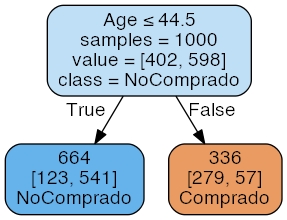

In [ ]:
plotDecisionTree(classTree, feature_names=car_df.columns[:2], class_names=classTree.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.8
Grow tree fully - Árbol adulto

## Class Tree

Classes: Comprado, NoComprado


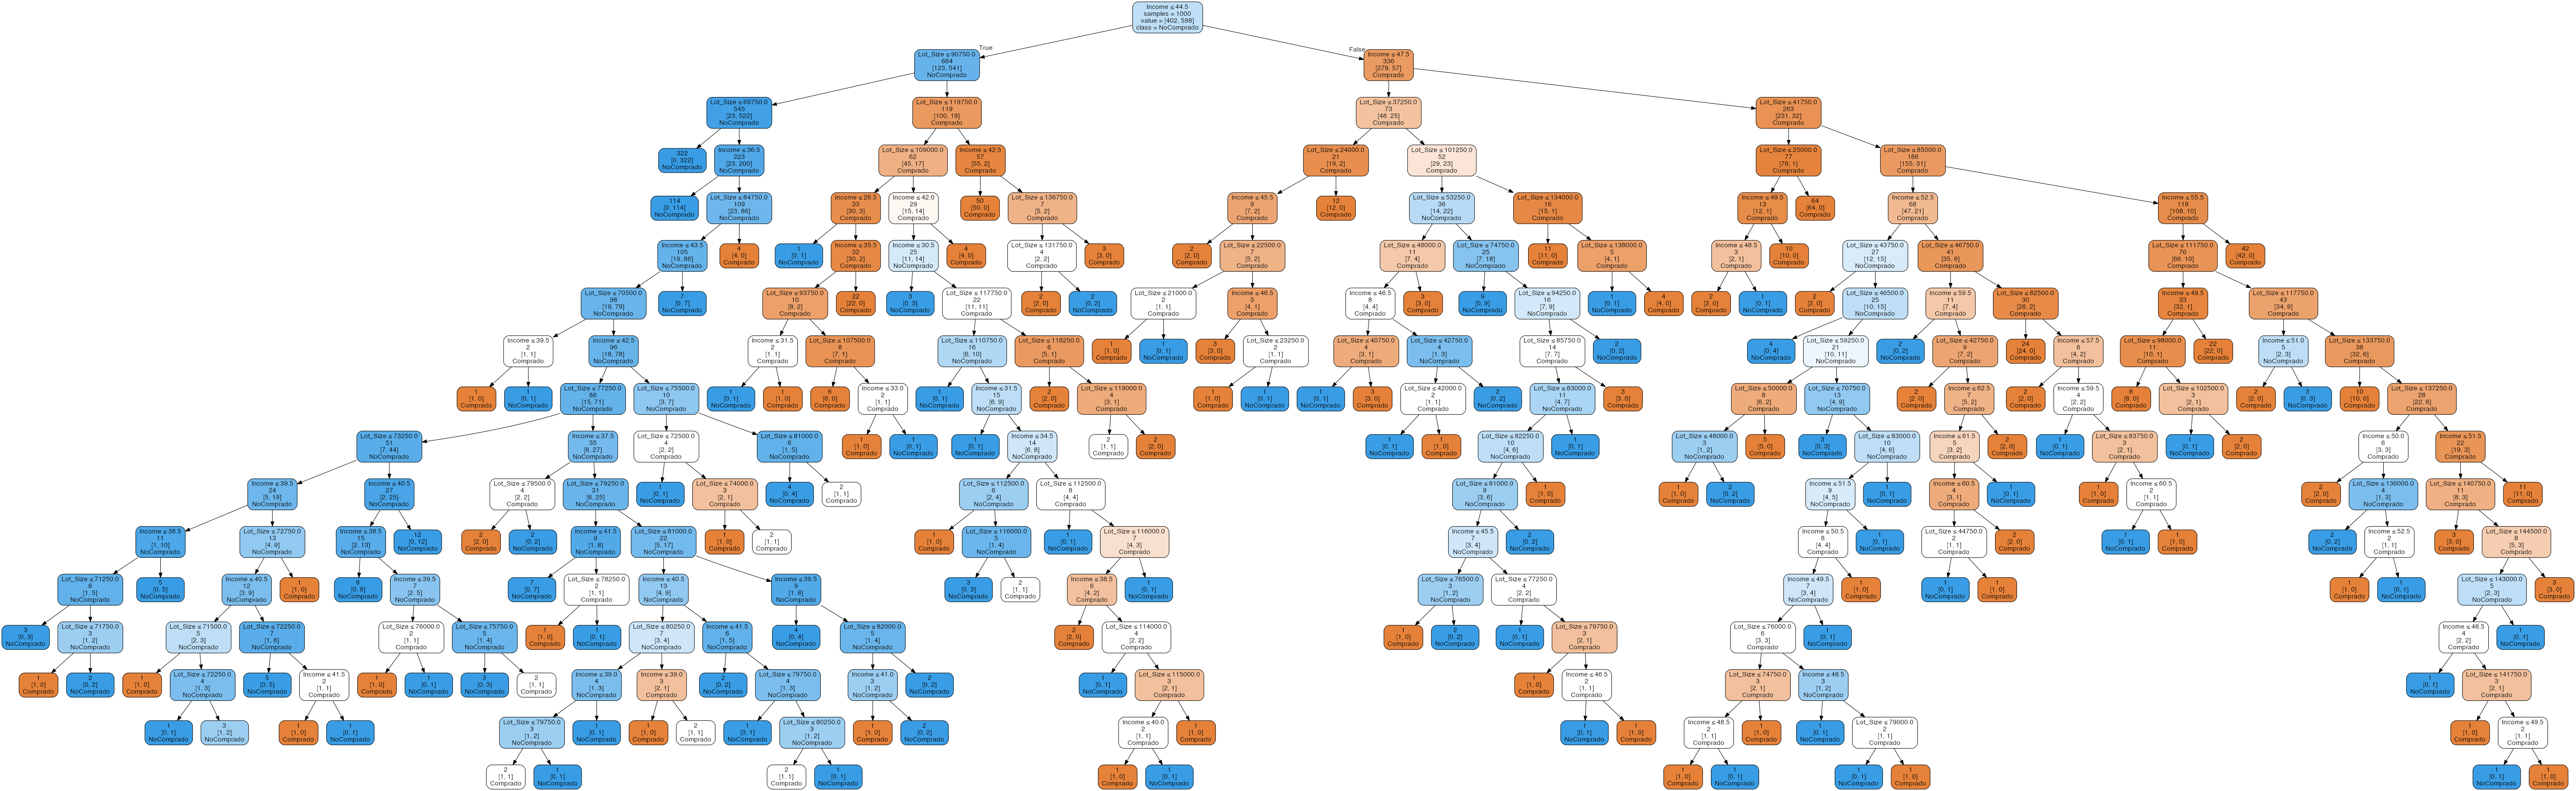

In [ ]:
classTree = DecisionTreeClassifier(random_state=0) #no se especifica ninguna profundidad
classTree.fit(X, y)
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## fullClassTree

Orden de clases: ['Comprado' 'NoComprado']


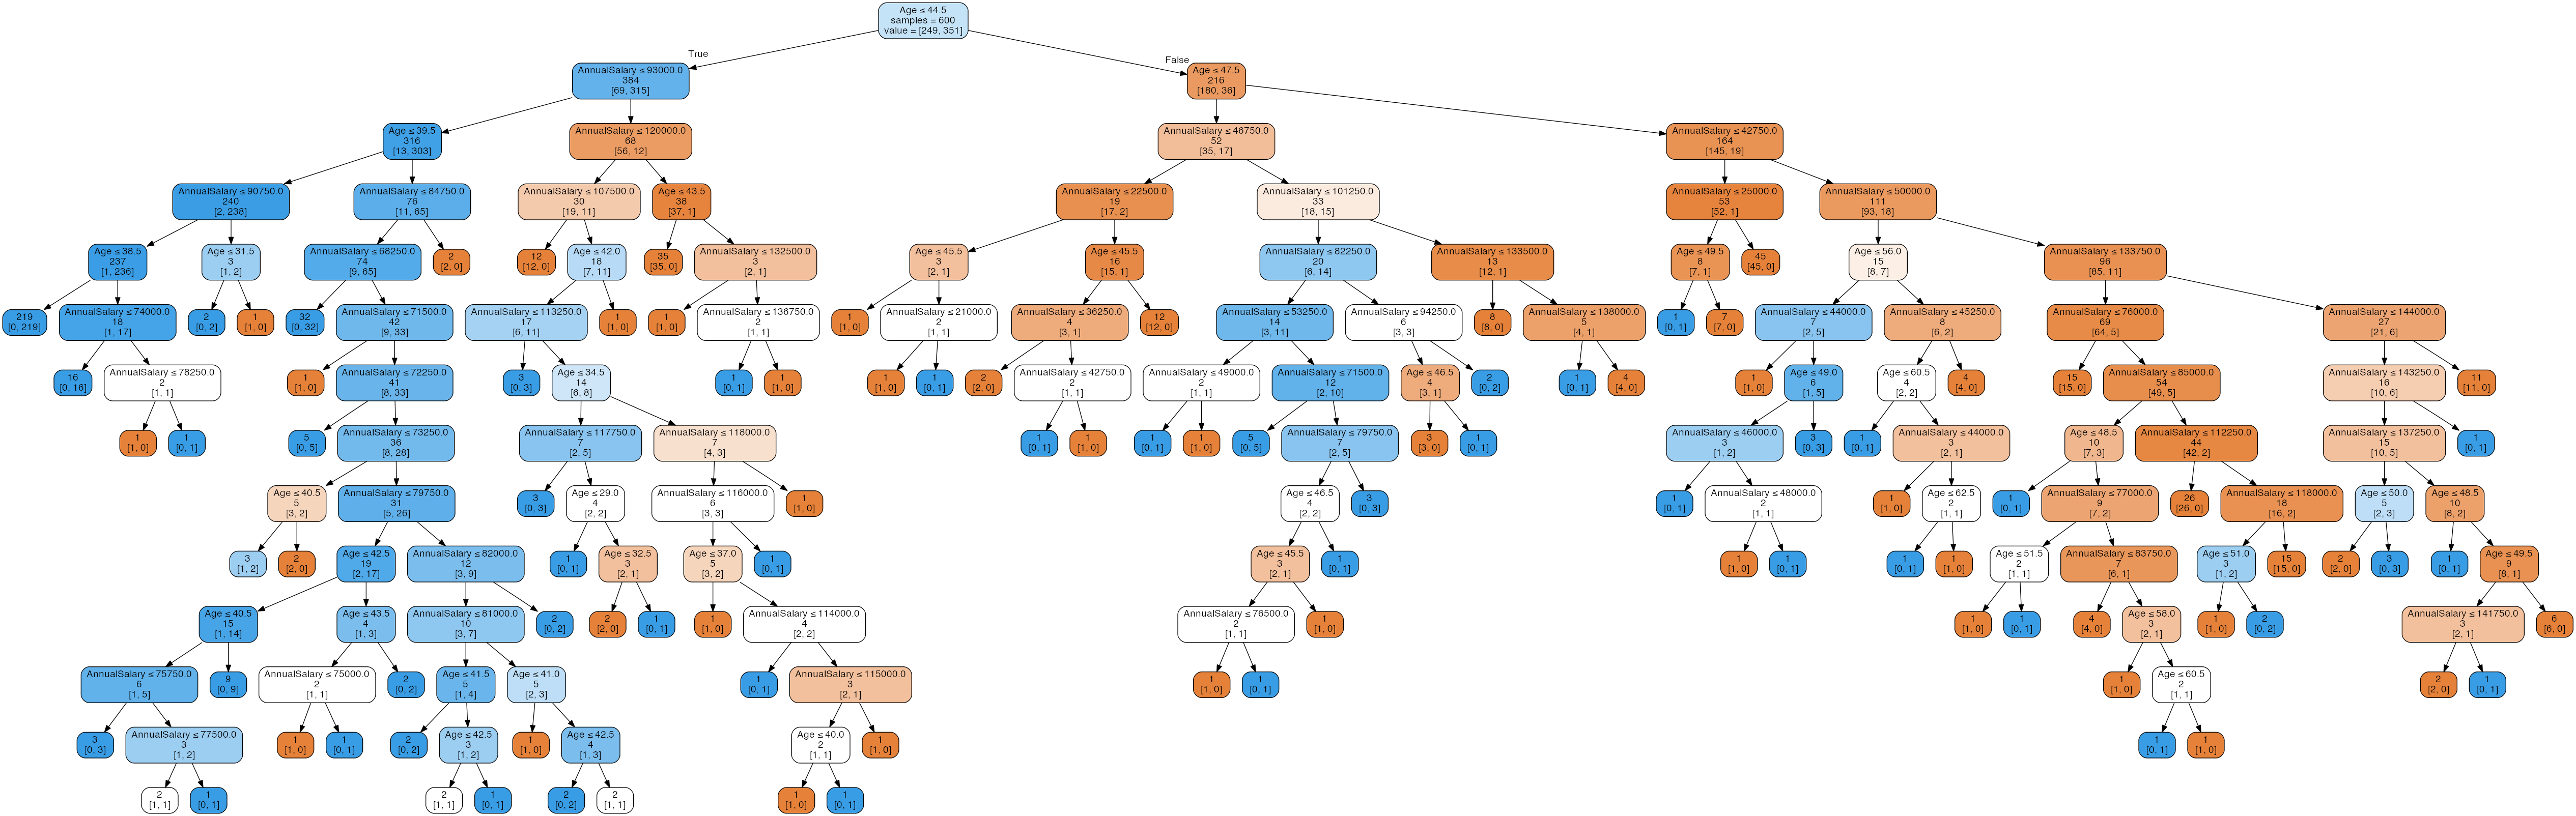

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

print('Orden de clases: '+ str(fullClassTree.classes_))

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

## Table 9.3
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [ ]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9933)

       Prediction
Actual   0   1
     0 248   1
     1   3 348
Confusion Matrix (Accuracy 0.8625)

       Prediction
Actual   0   1
     0 124  29
     1  26 221


## Table 9.4  --- K-fold cross validation

In [ ]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.825', '0.842', '0.825', '0.858', '0.867']
Accuracy: 0.843 (+/- 0.034)
Accuracy: 0.843 (+/- 0.017)


## Figure 9.12

## smallClassTree

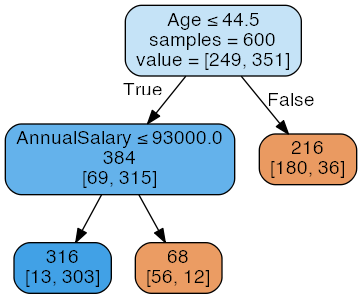

In [ ]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

## Table 9.5

In [ ]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8983)

       Prediction
Actual   0   1
     0 236  13
     1  48 303
Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual   0   1
     0 139  14
     1  26 221


In [ ]:
car_df.AnnualSalary.max()

1.0

## Figure 9.16

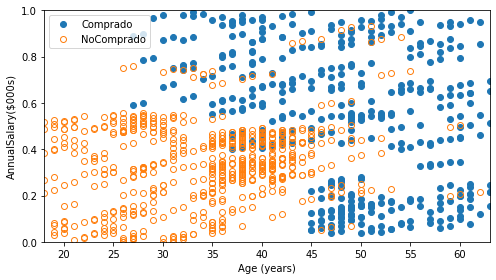

In [ ]:
def basePlot(ax):
    car_df.loc[car_df.Purchased=='Comprado'].plot(x='Age', y='AnnualSalary', style='o',
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    car_df.loc[car_df.Purchased=='NoComprado'].plot(x='Age', y='AnnualSalary', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Comprado", "NoComprado"]);
    ax.set_xlim(18, 63)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('AnnualSalary($000s)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

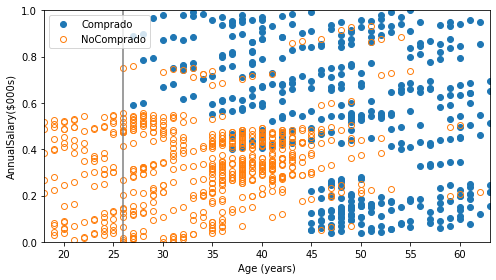

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 26
ax.plot((x0, x0), (0, 1), color='grey')
plt.tight_layout()
plt.show()

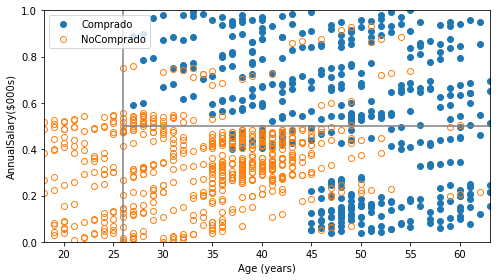

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 26
y1 = 0.5
ax.plot((x0, x0), (0, 1), color='grey')
ax.plot((x0, 63), (y1, y1), color='grey')
plt.tight_layout()
plt.show()

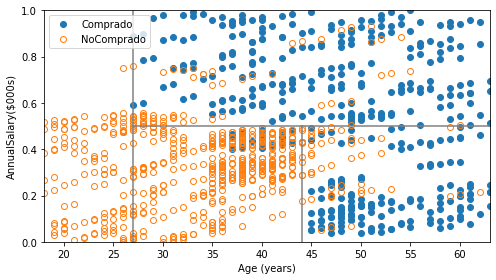

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 27
x1 = 44
y1 = 0.5
ax.plot((x0, x0), (0, 1), color='grey')
ax.plot((x0, 63), (y1, y1), color='grey')
ax.plot((x1, x1), (0, y1), color='grey')
plt.tight_layout()
plt.show()

# Conclusiones

1. Se concluye que los árboles de decisión permiten clasificar en dos ramificaciones valores en una clase determinada con respecto a las variables categóricas predictoras de una manera gráfica e intuitiva.

1. Se concluye que la clasificación de variables mediante árboles de decisión están propensos a un sobreajuste por la repetitiva segmentación de las variables.

# Bibliografía

Michael Galarnyk. (1 de Abril de 2020). Visualizing Decision Trees with Python (Scikit-learn, Graphviz, Matplotlib) https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
